<center><h1><b>Reconocimiento de tipos de música con <i>machine learning</i></b></h1></center><br>
- <b>Autor:</b> Edwin Jahir Rueda Rojas
- <b>Email:</b> ejrueda95g@gmail.com
- <b>site:</b> www.edwinrueda.com
<br>
<br>
<h4>Herramientas utilizadas:</h4>
- Python  v3.6.5
- Pandas  v0.23.0
- Numpy  v1.14.3
- sklearn  v0.19.1
- matplotlib  v2.2.2
- xgboost  v0.82
<br><br>
- link de la competición: https://www.kaggle.com/c/music4ed/overview

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Cargando los datos de entrenamiento:
- se cargan los datos de entrenamiento, el cual es un archivo "csv" con 12495 registros.

In [9]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


In [10]:
print("Dimesionalidad de los datos: ", data_train.shape)

Dimesionalidad de los datos:  (12495, 192)


### Etiquetas:
- Debido a que el <i>target</i> está dado en texto, este se tiene que cambiar a valores númericos, para eso etiquetamos de 1 a 6 las diferentes clases.

In [11]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

### Cargando los datos de test
- Se cargan los datos de test, los cuales van a ser subidos a kaggle, los cuales tienen 5225 registros.

In [13]:
data_test = pd.read_csv("./data/genresTest.csv")
print("Dimensionalidad de los datos: ", data_test.shape)
data_test.head()

Dimensionalidad de los datos:  (5225, 191)


,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5851,887.72,203130.0,-0.17260,-0.16509,-0.15114,-0.14272,-0.13747,-0.13437,-0.12990,...,0.014458,0.003283,0.060789,0.000173,0.049469,0.000209,0.014727,0.000058,0.003690,0.000007
1,2.4621,370.86,4835.0,-0.16553,-0.16676,-0.16022,-0.15304,-0.14354,-0.13443,-0.12450,...,0.007165,0.001832,0.019472,0.000006,0.021197,0.000100,0.008136,0.000055,0.002112,0.000006
2,2.5894,536.33,59175.0,-0.14433,-0.15838,-0.15151,-0.13966,-0.12591,-0.11795,-0.11744,...,0.009742,0.002032,0.037165,0.000158,0.037856,0.000123,0.009627,0.000068,0.001916,0.000004
3,2.4876,1053.70,147250.0,-0.12813,-0.11979,-0.12223,-0.11881,-0.12020,-0.12702,-0.13608,...,0.020571,0.002458,0.074786,0.000113,0.088109,0.000152,0.021083,0.000071,0.002590,0.000006
4,2.7968,354.90,7610.9,-0.16335,-0.16976,-0.17196,-0.16772,-0.16637,-0.15903,-0.13995,...,0.004825,0.001905,0.017377,0.000015,0.010852,0.000153,0.004702,0.000044,0.002101,0.000008


### Matriz de correlación:
- Se genera la matriz de correlación para los datos como en los notebook anexos a este repositorio, teniendo en cuenta que se elimina uno de los pares de <i>features</i> que tengan una correlación superior al 0.85.

In [14]:
m_cor = data_train.corr()
dict_l = {}
for i in m_cor.index:
    dict_l.update({i:m_cor[m_cor[i]>.85].index})

In [16]:
cols_drop = []
for idx in dict_l:
    if not (idx in cols_drop): #si ya está para eliminar no se revisa
        for j in range(len(dict_l[idx])):
            if idx != dict_l[idx][j]: #el se quiere mantener
                if not (dict_l[idx][j] in cols_drop): #si no se a eliminado se puede eliminar
                    cols_drop.append(dict_l[idx][j])
                    #print(idx, dict_l[idx][j])

print("Número de columnas a eliminar: ", len(cols_drop))
print("---------------------------------")
print("Columnas a eliminar: ", cols_drop)

Número de columnas a eliminar:  47
---------------------------------
Columnas a eliminar:  ['PAR_ZCD', 'PAR_2RMS_TCD', 'PAR_ZCD_10FR_MEAN', 'PAR_ASE2', 'PAR_ASE4', 'PAR_ASE5', 'PAR_ASE7', 'PAR_ASE11', 'PAR_ASE24', 'PAR_ASE26', 'PAR_ASE28', 'PAR_ASE30', 'PAR_ASEV2', 'PAR_ASEV3', 'PAR_ASEV5', 'PAR_ASEV7', 'PAR_SFM10', 'PAR_SFM12', 'PAR_SFM14', 'PAR_SFM15', 'PAR_SFM_M', 'PAR_SFM17', 'PAR_SFM19', 'PAR_SFMV20', 'PAR_MFCCV1', 'PAR_MFCCV2', 'PAR_MFCCV3', 'PAR_MFCCV4', 'PAR_MFCCV5', 'PAR_MFCCV6', 'PAR_MFCCV7', 'PAR_MFCCV8', 'PAR_MFCCV9', 'PAR_MFCCV10', 'PAR_MFCCV11', 'PAR_MFCCV12', 'PAR_MFCCV13', 'PAR_MFCCV14', 'PAR_MFCCV15', 'PAR_MFCCV16', 'PAR_MFCCV17', 'PAR_MFCCV18', 'PAR_MFCCV19', 'PAR_MFCCV20', 'PAR_1RMS_TCD_10FR_MEAN', 'PAR_2RMS_TCD_10FR_MEAN', 'PAR_3RMS_TCD_10FR_MEAN']


### Eliminación de caracteristicas similares
- Se eliminan las caracteristicas menciondas anteriormente, reduciendo así la dimensionalidad de los datos, de 191 caracteristicas a 144, una reducción del 24,6%.

In [20]:
df_train_drop = data_train
df_test_drop = data_test
for idx in np.unique(cols_drop):
    df_train_drop = df_train_drop.drop(idx,axis=1)
    df_test_drop = df_test_drop.drop(idx,axis=1)

In [22]:
print("----- Nuevos datos de entrenamiento -----")
df_train_drop.head()

----- Nuevos datos de entrenamiento -----


,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE3,PAR_ASE6,PAR_ASE8,PAR_ASE9,PAR_ASE10,PAR_ASE12,...,PAR_PEAK_RMS_TOT,PAR_PEAK_RMS10FR_MEAN,PAR_PEAK_RMS10FR_VAR,PAR_1RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11176,-0.11026,-0.12465,-0.13659,-0.13951,-0.13893,...,3.9295,4.0001,0.32300,0.048272,0.002032,0.000091,0.000231,0.000024,0.000003,5
1,2.7195,1405.30,825380.0,-0.17655,-0.17773,-0.16174,-0.14458,-0.14691,-0.15324,-0.14155,...,5.1372,5.7044,3.18450,0.085800,0.005959,0.001122,0.003869,0.000779,0.000041,1
2,2.5351,601.09,686240.0,-0.13940,-0.11486,-0.10936,-0.12948,-0.12599,-0.12750,-0.13485,...,3.8047,3.7870,0.31701,0.044132,0.002766,0.000358,0.000211,0.000038,0.000002,5
3,2.4465,637.73,122580.0,-0.14995,-0.13800,-0.12340,-0.12010,-0.12907,-0.12677,-0.13761,...,5.2128,5.4222,1.74920,0.035492,0.002503,0.000356,0.000118,0.000045,0.000006,3
4,2.5657,776.86,124010.0,-0.16863,-0.15935,-0.13002,-0.13167,-0.13584,-0.13075,-0.11369,...,5.9162,6.4966,4.32160,0.046871,0.002703,0.000302,0.000606,0.000152,0.000029,3


### Columnas a escalar
- Se resolvió no escalar todas las columnas ya que por procedimientos previos se vio que el rendimiento del <i>voting classifier</i> se reducia, por ende solo se escalan las caracteristicas mensionadas abajo.
<br><br><b>Escalado de la forma:</b>
<h3><center>$$X = \frac{x_{i} - \overline{X}}{max(X) - min(X)}$$</center></h3>
<br><br>
- A su vez se resolvió eliminar 3 columnas las cuales tenian valores muy dispersos.

In [26]:
col_scalar = ["PAR_TC", "PAR_ASC", "PAR_ASS", "PAR_PEAK_RMS_TOT", "PAR_PEAK_RMS10FR_MEAN"]
col_outliers = ["PAR_SC","PAR_SC_V", "PAR_PEAK_RMS10FR_VAR"]

In [27]:
def column_scale(df, l_cols):
    """
    df: DataFrame de entrada
    l_cols: lista de columnas a escalar
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    for col in l_cols:
        #se cambia cada columna
        df[col] = (df[col] - np.mean(df[col]))/(max(df[col]) - min(df[col]))
        #df[col] = (df[col] - min(df[col]))/((max(df[col]) - min(df[col])))
    return df

In [28]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

X_trdrop = column_scale(X_trdrop, col_scalar)
X_testdrop = df_test_drop
X_testdrop = column_scale(X_testdrop, col_scalar)

X_trdrop = X_trdrop.drop(col_outliers, axis=1)

X_testdrop = X_testdrop.drop(col_outliers, axis=1)

In [30]:
print("Porcentaje de registros por clase")
print("---------------------------------")
print("clase 1: ",np.mean(y_trdrop==1)*100)
print("clase 2: ",np.mean(y_trdrop==2)*100)
print("clase 3: ",np.mean(y_trdrop==3)*100)
print("clase 4: ",np.mean(y_trdrop==4)*100)
print("clase 5: ",np.mean(y_trdrop==5)*100)
print("clase 6: ",np.mean(y_trdrop==6)*100)

Porcentaje de registros por clase
---------------------------------
clase 1:  12.773109243697478
clase 2:  27.563025210084035
clase 3:  24.03361344537815
clase 4:  7.394957983193278
clase 5:  12.605042016806722
clase 6:  15.630252100840336


### Se entrena un primer comité de clasificadores:
- De este comité obtendremos los registros para los cuales todos los clasificadores dijeron que el registro pertenecia a cierta clase, para así posteriormente, añadir esos nuevos registros, como reistros de entrenamiento y así volver a entrenar el comité.

In [31]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from time import time

t_i = time()
clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
clf2 = KNeighborsClassifier(n_neighbors=12, p=1)
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf4 = xgb.XGBClassifier(n_estimators=250, objective='multi:softprob', n_jobs=1)
clf5 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('knn', clf2), ('gbc', clf3), ('xgb', clf4), ('dtc', clf5)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)
t_f = time()
print("Score en entrenamiento: ", eclf1.score(X_trdrop, y_trdrop))
print("Tiempo de entrenamieto: ", (t_f-t_i)/60, "[min]")
predict = eclf1.predict(X_testdrop)

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Score en entrenamiento:  0.9991996798719488
Tiempo de entrenamieto:  5.358525987466177 [min]


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
result = pd.DataFrame(data=predict.astype(int), index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_141.csv')

### Predicción:
- Se puede ver que la cantidad de registros que el comité predijo que pertenecian a la clase 4 es muy bajo.

In [33]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.751196172248803
clase 2:  24.74641148325359
clase 3:  34.48803827751196
clase 4:  1.875598086124402
clase 5:  10.832535885167465
clase 6:  20.30622009569378


### Añadiendo registros a entrenamiento:
- Como se habló anteriormente, se toman los registros que todos los clasificadores dijeron que pertenecian a la misma clase, y se entrena otro comité con estos nuevos registros.<b>
- Importante:</b> solo se toman los registros para las clases 1, 4 y 5, ya que son las que están mas desbalanceadas.

In [34]:
r_class = eclf1.transform(X_testdrop)
r_class

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[0, 5, 0, 0, 0],
       [1, 1, 1, 1, 2],
       [1, 2, 1, 1, 1],
       ...,
       [5, 5, 5, 5, 5],
       [4, 4, 4, 4, 4],
       [5, 2, 5, 5, 5]])

In [35]:
new_data_index = []
new_class = []
index = 0
for i in r_class:
    if np.mean(i) == i[0]:
        if int(np.mean(i))+1 == 4 or int(np.mean(i))+1 == 1 or int(np.mean(i))+1 == 5: #para escoger solo los de la clase 4
            new_data_index.append(index)
            new_class.append(int(np.mean(i))+1)
    index += 1

In [37]:
print("Número de registros nuevos: ",len(new_class))

Número de registros nuevos:  262


In [38]:
X_trdrop = pd.concat((X_trdrop, X_testdrop.loc[new_data_index]))
y_trdrop = pd.concat((y_trdrop, pd.Series(new_class)))

In [40]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t_i = time()
clf1 = RandomForestClassifier(n_estimators=750, class_weight="balanced_subsample")
clf2 = KNeighborsClassifier(n_neighbors=12, p=1)
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf4 = xgb.XGBClassifier(n_estimators=250, objective='multi:softprob', n_jobs=1)
clf5 = DecisionTreeClassifier()
clf6 = GaussianNB()
clf7 = LinearDiscriminantAnalysis(solver="lsqr",n_components=1)

eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('knn', clf2), ('gbc', clf3), ('xgb', clf4), ('dtc', clf5), ('gnb',clf6),('lda',clf7)],
                         voting='hard')

X_train, X_test, y_train, y_test = train_test_split(X_trdrop, y_trdrop, test_size=0.3, random_state=42)
eclf1 = eclf1.fit(X_train, y_train)

score = cross_val_score(eclf1, X_trdrop, y_trdrop, cv=10, n_jobs=2)
t_f = time()
print("Tiempo de entramiento: ", (t_f-t_i)/60, "[min]")

predict = eclf1.predict(X_test)
#result = pd.DataFrame(data=predict.astype(int), index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
#result.index.name = "Id"
#result.to_csv('./results/submission_test_142.csv')

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not 

Tiempo de entramiento:  3.699869187672933 [min]


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
print("Score en cada k-fold: ", score)

Score en cada k-fold:  [0.94131455 0.9428795  0.93114241 0.92241379 0.94352941 0.94509804
 0.94745098 0.94740973 0.94897959 0.95839874]


In [42]:
print("Score promedio: ", np.mean(score))

Score promedio:  0.9428616756773568


### Validación cruzada:
- Se realiza una validación cruzada del modelo, con k-fold(k=10), para medir el rendimiento del comité de clasificadores y que tanta desviación tiene el modelo.

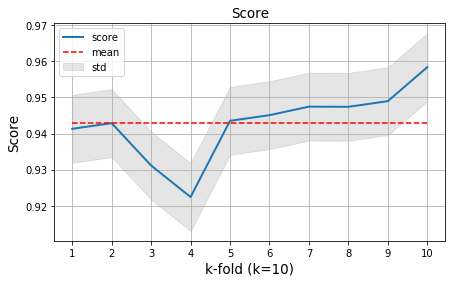

In [50]:
plt.figure(figsize=(7,4))
plt.grid()
plt.title("Score", fontsize=13.5)
plt.ylabel("Score", fontsize=13.5)
plt.xlabel("k-fold (k=10)", fontsize=13.5)
plt.xticks(range(1,11),range(1,11))
plt.plot(range(1,11), score, label="score",linewidth=2)
plt.plot(range(1,11), np.ones(10)*np.mean(score), color="red", alpha=1, linestyle='--', label="mean")
plt.fill_between(range(1,11), score - np.std(score), score + np.std(score),color='gray',
                 alpha=0.2, label="std")
plt.legend();

### Predicción de clases:
- Se puede ver que ahora el nuevo comité de clasificadores genera predicciones mas equilibradas en cuanto al número de registros por clase.

In [51]:
print("clase 1: ",np.round(np.mean(predict==1)*100, 2))
print("clase 2: ",np.round(np.mean(predict==2)*100, 2))
print("clase 3: ",np.round(np.mean(predict==3)*100, 2))
print("clase 4: ",np.round(np.mean(predict==4)*100, 2))
print("clase 5: ",np.round(np.mean(predict==5)*100, 2))
print("clase 6: ",np.round(np.mean(predict==6)*100, 2))

clase 1:  13.22
clase 2:  28.71
clase 3:  22.05
clase 4:  7.52
clase 5:  13.87
clase 6:  14.63


### Matriz de confusión:
- Se crea la matriz de confusión para ver donde el algoritmo está fallando, dada esta matiz, se puede ver que el algoritmo está confundiendo las clases 2 y 3, y por otro lado, confunde un poco la clase 3, diciendo que es 6.

In [52]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_test, predict)

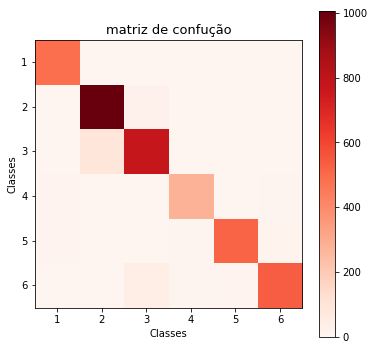

In [64]:
plt.figure(figsize=(6,6))
plt.imshow(mc, interpolation='nearest', cmap=plt.get_cmap('Reds'))
plt.title("matriz de confução", size=13)
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.xticks(range(0,6),range(1,7))
plt.yticks(range(0,6),range(1,7))
plt.colorbar();